<a href="https://colab.research.google.com/github/KASA-RAHUL/EDA/blob/main/Walmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="lightgreen"> <font size="5"> **Business Problem** <br>
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


#<font color="lime">About Walmart
<font color="lime"> Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy import stats
from scipy.stats import norm, binom, geom,poisson

In [ ]:
sns.set(style="darkgrid") # backgroung for plots

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart.csv
100% 23.0M/23.0M [00:00<00:00, 126MB/s] 


In [ ]:
df=pd.read_csv('walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.duplicated().value_counts()

,count
False,550068


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.isnull().sum()/100

,0
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category,0.0
Purchase,0.0


In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df['Occupation']=df['Occupation'].astype('category')
df["Marital_Status"] = df["Marital_Status"].replace({0:"Unmarried", 1:"Married"})
df['User_ID']=df['User_ID'].astype('category')
df['Product_Category']=df['Product_Category'].astype('category')
df['City_Category']=df['City_Category'].astype('category')
df['Gender']=df['Gender'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  object  
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(1), object(4)
memory usage: 24.3+ MB


<font color="lime">Insight

<font color="lime">A quick look at the information of the data reveals that there are 550068 rows and 10 columns implying 550068 items have been sold to customers with information of each customer like User_ID, Gender, Age, Occupation to name a few.

<font color="lime">We can also infer that there are no missing values or nulls in the dataset.

<font color="lime">There are 2 genders, 7 age groups, 21 occupations, 3 city categories, 5 year groups of stay, 2 marital status and 20 categories of product.

<font color="lime">There are no duplicate entries.

In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,Married,20,490


In [ ]:

df.describe(include=['object','category'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
print(df['Purchase'].describe())

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


<font color="lime">
Males are the majority buyers

<font color="lime"> People in the age group 26-35 have made the maximum number of purchases

<font color="lime"> People with occupation 4 have made the maximum number of purchases

 <font color="lime">People from city category B have made the maximum number of purchases

<font color="lime"> People staying in the current city for 1 year have made the maximum number of purchases

Unmarried customers have made the maximum number of purchases </font>

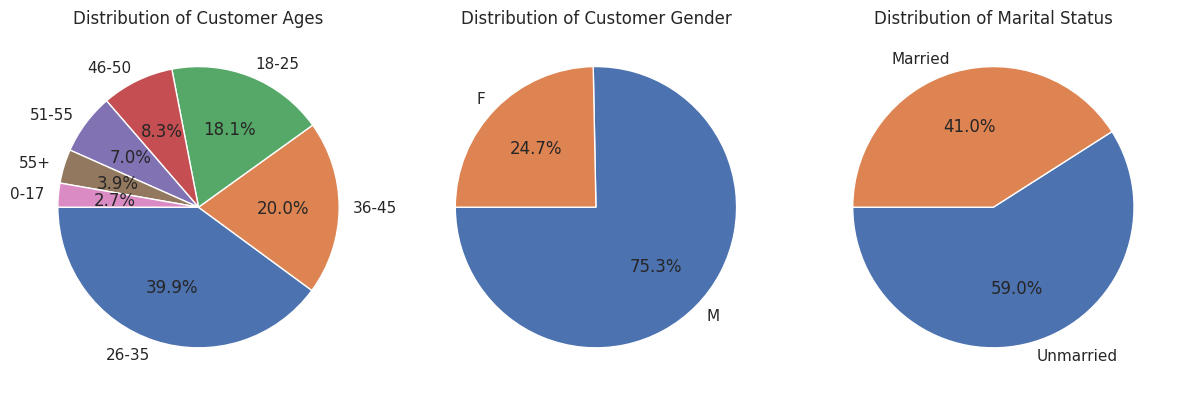

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
df['Age'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Customer Ages')
plt.ylabel('')  # Remove the y-axis label
#plt.show()

plt.subplot(1, 3, 2)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Customer Gender')
plt.ylabel('')  # Remove the y-axis label

plt.subplot(1, 3, 3)
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Marital Status')
plt.ylabel('')  # Remove the y-axis label

plt.tight_layout()

plt.show()


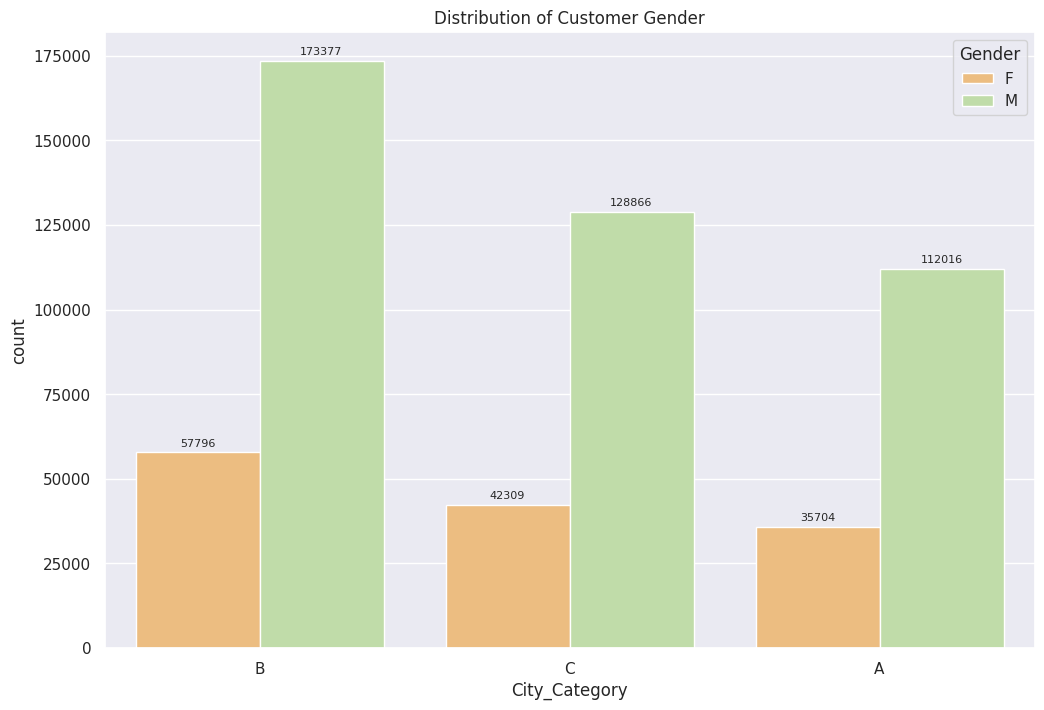

In [ ]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(x='City_Category', data=df, hue='Gender',order=df['City_Category'].value_counts().index,palette='Spectral')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3)

plt.title('Distribution of Customer Gender')
plt.show()

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [ ]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


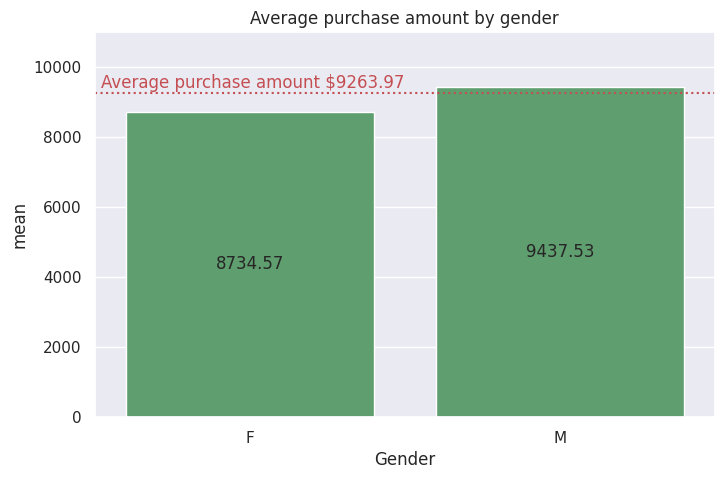

In [ ]:
purchase_avg = df['Purchase'].mean()
df_group_gender = df.groupby('Gender')['Purchase'].agg(['sum','mean']).reset_index()
plt.figure(figsize=(8,5))
ax=sns.barplot(data=df_group_gender, x='Gender', y='mean',color='g')
ax.set_ylim(0,11000)
ax.bar_label(ax.containers[0], label_type='center')
plt.axhline(y=purchase_avg, color='r', linestyle = ':')
plt.text(0.01, purchase_avg+300, f"Average purchase amount ${purchase_avg:.2f}", ha='center', va='center', color='r')
plt.title("Average purchase amount by gender")
plt.show()


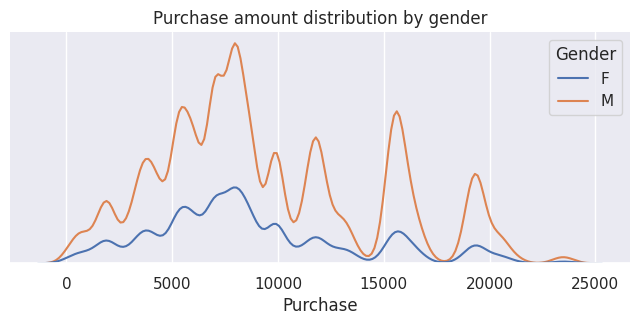

In [ ]:
plt.figure(figsize=(8,3))
ax = sns.kdeplot(data=df, x='Purchase', hue='Gender')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_ylabel('')
plt.title('Purchase amount distribution by gender')
plt.show()


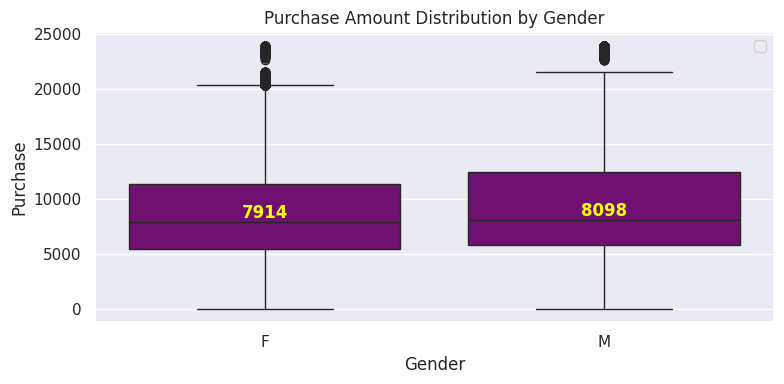

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.boxplot(data=df, x='Gender', y='Purchase', color='purple')

grouped = df.groupby('Gender')['Purchase']
medians = grouped.median()

for i, gender in enumerate(medians.index):
    median_val = medians[gender]
    ax.text(i, median_val, f'{median_val:.0f}', ha='center', va='bottom', color='yellow', fontweight='bold')

plt.title('Purchase Amount Distribution by Gender')
plt.legend()
plt.tight_layout()
plt.show()

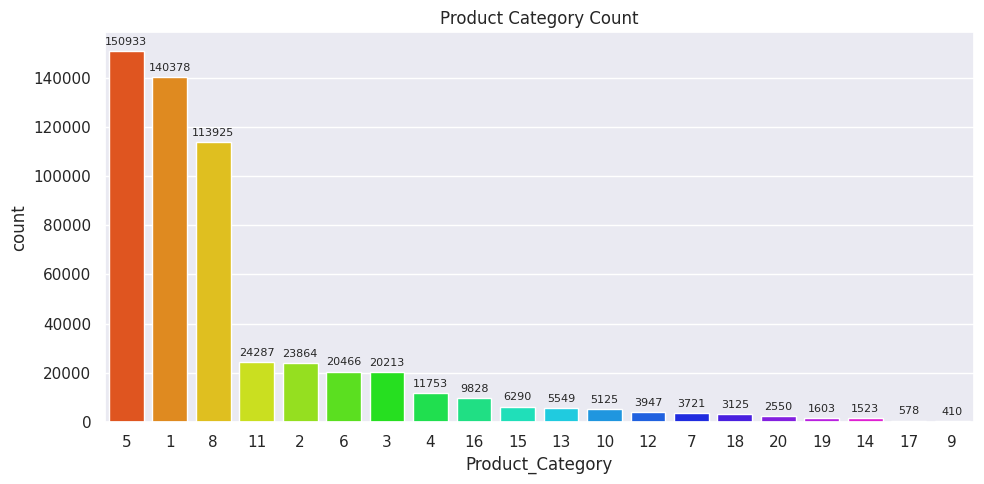

In [ ]:
plt.figure(figsize=(10,5))
data = df["Product_Category"]
colors = sns.color_palette("hsv", len(data.value_counts()))
ax=sns.countplot(x = data, order=data.value_counts().index,palette=colors)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3)
plt.title("Product Category Count")
plt.tight_layout()
plt.show()

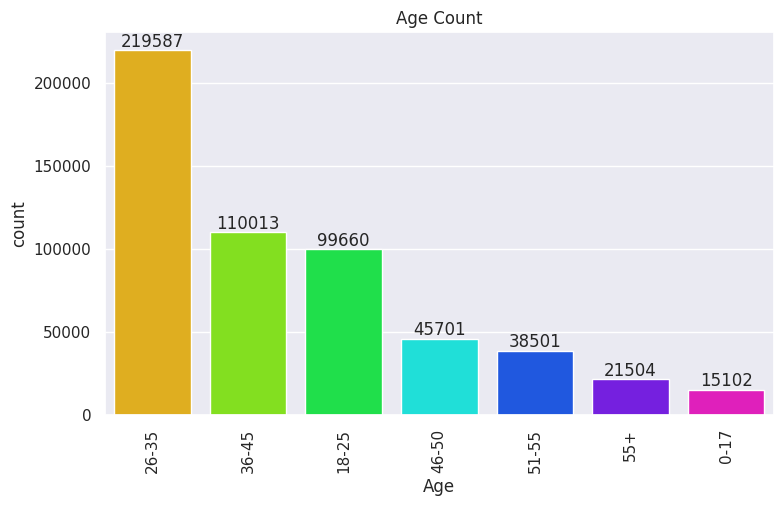

In [ ]:

plt.figure(figsize=(8,5))
data = df["Age"]
order = data.value_counts().index
colors = sns.color_palette("hsv", len(order))
ax = sns.countplot(x=data, order=order, palette=colors)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Age Count")
plt.show()

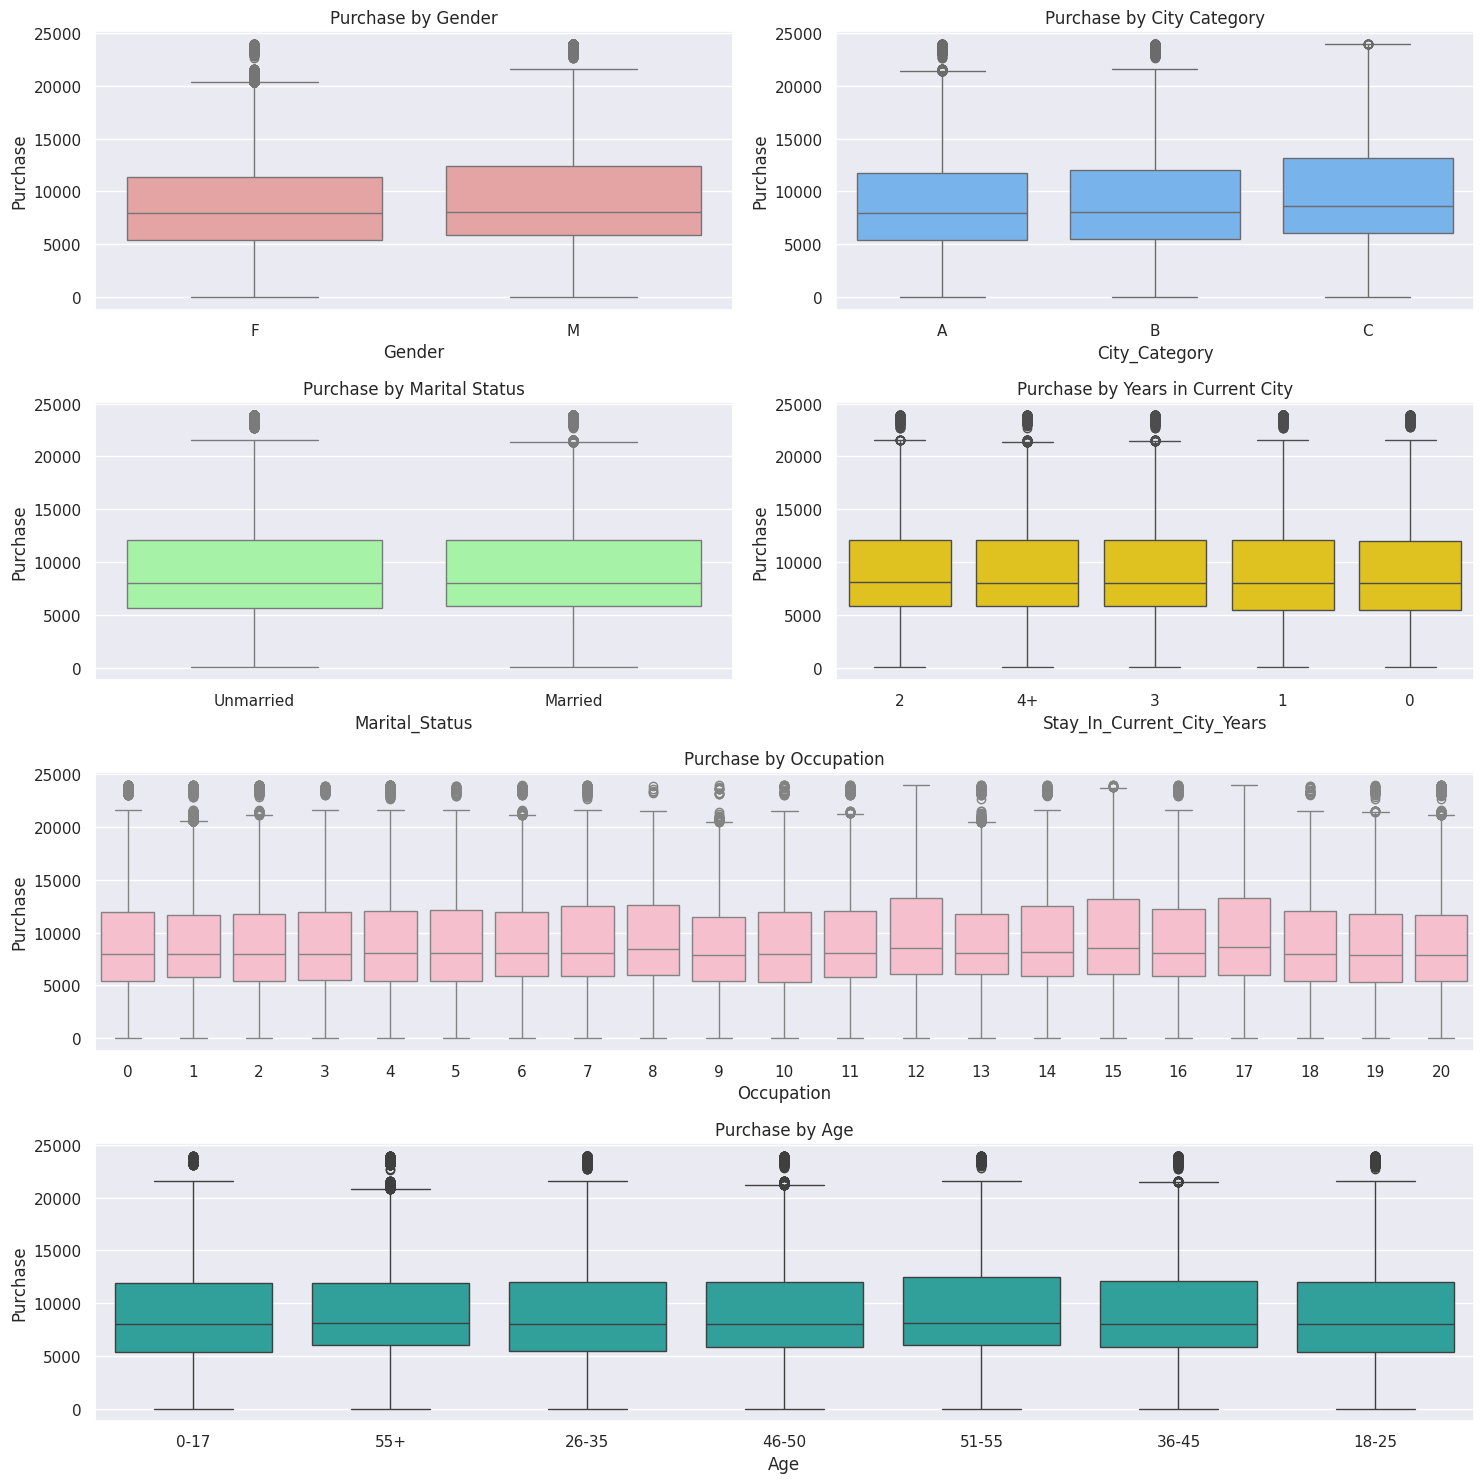

In [ ]:
colors = ['#EF9998', '#66B3FF', '#99FF99', '#FFD700', '#FFB6C9', '#20B2AA']

plt.figure(figsize=(15,15))

# Plot 1
plt.subplot(4, 2, 1)
sns.boxplot(data=df, x="Gender", y="Purchase", color=colors[0])
plt.title("Purchase by Gender")

# Plot 2
plt.subplot(4, 2, 2)
sns.boxplot(data=df, x="City_Category", y="Purchase", color=colors[1])
plt.title("Purchase by City Category")

# Plot 3
plt.subplot(4, 2, 3)
sns.boxplot(data=df, x="Marital_Status", y="Purchase", color=colors[2])
plt.title("Purchase by Marital Status")

# Plot 4
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", color=colors[3])
plt.title("Purchase by Years in Current City")

# Plot 5
plt.subplot(4, 1, 3)
sns.boxplot(data=df, x="Occupation", y="Purchase", color=colors[4])
plt.title("Purchase by Occupation")

# Plot 6
plt.subplot(4, 1, 4)
sns.boxplot(data=df, x="Age", y="Purchase", color=colors[5])
plt.title("Purchase by Age")

plt.tight_layout()
plt.show()


<font color="lime">
Insight

<font color="lime">
Gender-Based Spending:
<font color="lime"> <br>
Males tend to have slightly higher median purchases and a wider spread, indicating a greater range of spending behavior compared to females.

<font color="lime"> <br>
City Category & Stay Duration Influence:

<font color="lime"> <br>
City Category B shows a slightly higher median purchase than A or C.
<font color="lime"> <br>
Users who have stayed in their city for 4+ years show similar purchasing behavior to newer residents, suggesting stability doesn't drastically change spending.
<font color="lime"> <br>
Age & Occupation Patterns:
<font color="lime"> <br>
The 26-35 age group shows the highest median and consistent spending.
<font color="lime"> <br>
Certain occupations (like IDs 4, 0, and 7) show significantly higher outliers, suggesting that a few job roles are linked to bigger purchases.

In [ ]:
sns.set(style="darkgrid")

<Axes: xlabel='Purchase', ylabel='Count'>

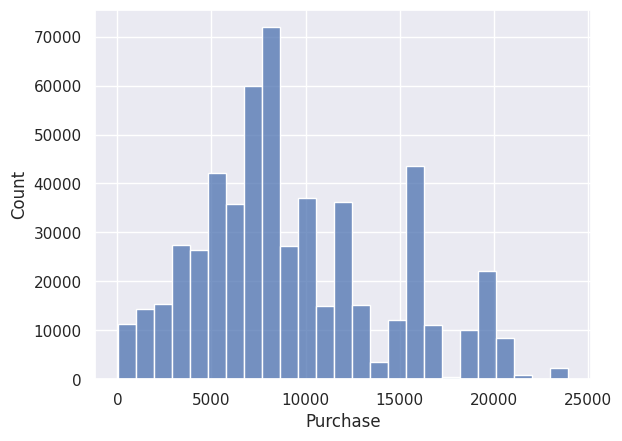

In [ ]:
sns.histplot(data=df, x = "Purchase", bins=25)

<font color="lime"> Insight

<font color="lime"> Most purchases fall between ₹5,000 and ₹10,000: These bins have the highest frequency, with the peak around ₹8,000–₹9,000, indicating a common purchase range for customers.

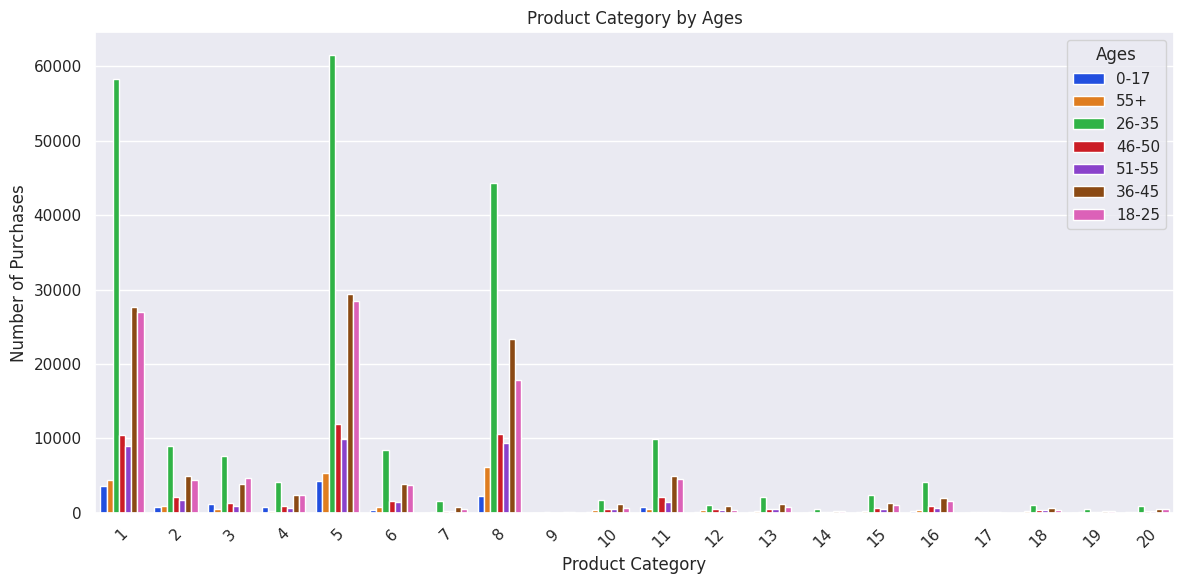

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product_Category', data=df,palette='bright', hue='Age')
plt.title("Product Category by Ages")
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='Ages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

In [ ]:
df['Product_Category'].value_counts()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


In [ ]:
def clt_ci(data, ci=95):

    mean = np.mean(data)
    stderr = stats.sem(data)
    margin = stats.t.ppf((1 + ci / 100) / 2, df=len(data) - 1) * stderr
    return mean - margin, mean + margin

def bootstrap_ci(data, n_bootstrap=1000, ci=95):

    means = [np.mean(np.random.choice(data, size=len(data), replace=True))
             for _ in range(n_bootstrap)]
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return lower, upper



def calculate_ci_for_sample(df, sample_size):
    sample = df.sample(n=sample_size, random_state=42)
    grouped = sample.groupby('Marital_Status')['Purchase']

    results = {}
    for status, purchases in grouped:
        data = purchases.values
        results[status] = {
            'sample_size': len(data),
            'mean': np.mean(data),
            'CLT_CI': clt_ci(data),
            'Bootstrap_CI': bootstrap_ci(data)
        }
    return results



sample_sizes = [300, 3000, 30000,len(df)]
all_results = {}

for size in sample_sizes:
    all_results[size] = calculate_ci_for_sample(df, size)


import pprint
pprint.pprint(all_results)


{300: {'Married': {'Bootstrap_CI': (np.float64(8196.4114),
                                    np.float64(10099.7066)),
                   'CLT_CI': (np.float64(8143.088566080901),
                              np.float64(10063.0554339191)),
                   'mean': np.float64(9103.072),
                   'sample_size': 125},
       'Unmarried': {'Bootstrap_CI': (np.float64(8271.289142857144),
                                      np.float64(9852.720857142856)),
                     'CLT_CI': (np.float64(8264.374457676811),
                                np.float64(9822.722685180332)),
                     'mean': np.float64(9043.548571428571),
                     'sample_size': 175}},
 3000: {'Married': {'Bootstrap_CI': (np.float64(8984.53438009788),
                                     np.float64(9543.821920880915)),
                    'CLT_CI': (np.float64(8982.356581099946),
                               np.float64(9541.142603239368)),
                    'mean': np.float64(

In [ ]:
from scipy.stats import ttest_ind
alpha=0.05
male_purchases = df[df['Gender'] == 'M']['Purchase']
female_purchases = df[df['Gender'] == 'F']['Purchase']
t_stat, p_val = ttest_ind(male_purchases, female_purchases)
print(f"T-test p-value: {p_val:.4f}")
if p_val < alpha:
  print('Reject the null hypothesis.')
else:
  print('Fail to reject the null hypothesis.')

T-test p-value: 0.0000
Reject the null hypothesis.


# <font color="lime"> If p-value < 0.05,  The difference is statistically significant.

In [ ]:
from scipy import stats

def calculate_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    ci = std_err * stats.t.ppf((1 + confidence) / 2, n-1)
    return mean, mean - ci, mean + ci

# For female customers
female_purchases = df[df['Gender'] == 'F']['Purchase']
f_mean, f_lower, f_upper = calculate_ci(female_purchases)

# For male customers
male_purchases = df[df['Gender'] == 'M']['Purchase']
m_mean, m_lower, m_upper = calculate_ci(male_purchases)

print(f"Female 95% CI: {f_mean:.2f} ({f_lower:.2f}-{f_upper:.2f})")
print(f"Male 95% CI: {m_mean:.2f} ({m_lower:.2f}-{m_upper:.2f})")

Female 95% CI: 8734.57 (8709.21-8759.92)
Male 95% CI: 9437.53 (9422.02-9453.03)


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


Marital_Status
Married      9261.174574
Unmarried    9265.907619
Name: Purchase, dtype: float64


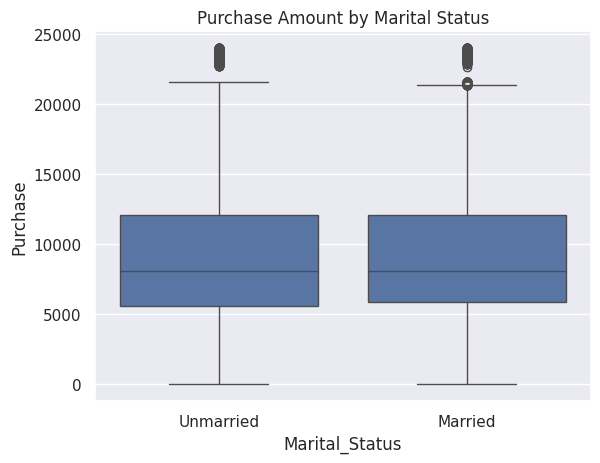

In [ ]:
# Convert to categorical
df['Marital_Status'] = df['Marital_Status']

# Average purchase by marital status
marital_avg = df.groupby('Marital_Status')['Purchase'].mean()
print(marital_avg)

# Visual comparison
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Purchase Amount by Marital Status')
plt.show()

# <font color="lime"> Recommendations <br>
Based on the statistical analysis of customer purchasing behavior using the full dataset and sampling methods (CLT & Bootstrap), the following recommendations are made for Walmart to improve marketing strategies, customer segmentation, and inventory decisions:

1. Gender-Based Targeting
Observation: Males have a statistically significantly higher average purchase than females. The confidence intervals for gender do not overlap, indicating a real difference in spending patterns.

Recommendation:

Walmart can introduce premium and high-value product promotions targeted toward male customers, especially in electronics, gadgets, and household tools.

For female customers, engagement-based incentives such as loyalty programs, personalized offers, and value bundles may help boost their spending.

2. Marital Status Strategies
Observation:

The confidence intervals for married and unmarried customers slightly overlap, meaning there is no strong statistical difference in average spending.

Recommendation:

Rather than targeting by marital status alone, consider finer segmentation like:

Married with children

Single professionals

Retired couples

Offer lifestyle-based product recommendations (e.g., family-size packs vs. personal-size packs) rather than marital-status-specific campaigns.

3. Age-Based Campaigning
Observation:

Middle-aged customers (especially 26–45 years) consistently show higher average purchase amounts. CIs for these age groups are clearly separated from younger and older groups.

Recommendation:

Design premium product bundles, targeted offers, and advertising specifically for this age range.

For younger customers (18–25), focus on:

Affordable alternatives

Student discounts

Fast fashion and tech accessories

For older customers (55+):

Offer senior discounts

Focus on essentials, wellness products, and comfort items.



# <font color="lime">  Final recommendations <br>
The data indicates that men tend to spend more than women. To optimize revenue and customer retention, the company can concentrate on strategies designed to retain its male customer base and attract additional male customers.

Implementing a rewards program for purchases exceeding amount can serve as an effective strategy to incentivize customers to spend more. This initiative can encourage higher-value transactions and foster customer loyalty, as individuals aim to attain the threshold for earning rewards.

Focusing advertising and promotional efforts on customers from City Type B who have been staying for 1 year can be a profitable strategy. This specific target audience appears to exhibit favorable spending patterns, making them a promising group for campaigns designed to boost sales and engagement.

Targetting Unmarried males and married females with advertisements specific to them can fetch new customers from the group and engage the existing customers more.

The high purchasing frequency observed for products in Product Categories 1, 5, and 8 suggests strong demand for items within these categories. Focusing on increasing the availability and promotion of products in these categories could be a profitable strategy for the company, as it aligns with consumer preferences and buying patterns.
The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

Identifying high-contributing occupation categories provides an opportunity for the company to explore partnerships with financial institutions or credit card providers. Offering credit cards or other benefits to customers in these occupations can be a strategic move to enhance sales and customer loyalty.

In [ ]:
print("-"*100)

----------------------------------------------------------------------------------------------------


In [ ]:
print("Thank you")

Thank you


In [ ]:
print("-"*100)

----------------------------------------------------------------------------------------------------
